In [1282]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [1283]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set(style="darkgrid")

### Data Import

In [1284]:
#uber_data = pd.read_csv('Uber Request Data.csv', parse_dates=['Request timestamp', 'Drop timestamp'])
uber_data = pd.read_csv('Uber Request Data.csv')

In [1285]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Inspecting the dataframe

In [1286]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [1287]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [1288]:
# Two date formats are found in the date columns

uber_data['Request timestamp1'] = pd.to_datetime(uber_data['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = uber_data['Request timestamp1'].isnull()
uber_data.loc[mask, 'Request timestamp1'] = pd.to_datetime(uber_data[mask]['Request timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

uber_data['Drop timestamp1'] = pd.to_datetime(uber_data['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = uber_data['Drop timestamp1'].isnull()
uber_data.loc[mask, 'Drop timestamp1'] = pd.to_datetime(uber_data[mask]['Drop timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

In [1289]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Drop timestamp1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [1290]:
# Deleting unnecessary columns 

uber_data= uber_data.drop(['Request timestamp', 'Drop timestamp'], axis =1)

uber_data = uber_data.rename(columns = {'Request timestamp1' : 'Request timestamp'})
uber_data = uber_data.rename(columns = {'Drop timestamp1' : 'Drop timestamp'})

In [1291]:
uber_data['Request timestamp'].value_counts(normalize=True)*100

2016-07-11 19:02:00    0.088955
2016-07-11 17:57:00    0.088955
2016-07-11 08:37:00    0.088955
2016-07-11 09:40:00    0.088955
2016-07-12 21:42:00    0.074129
                         ...   
2016-07-15 18:08:33    0.014826
2016-07-15 04:50:54    0.014826
2016-07-14 18:42:23    0.014826
2016-07-13 19:26:50    0.014826
2016-07-15 23:55:03    0.014826
Name: Request timestamp, Length: 5618, dtype: float64

In [1292]:
uber_data['Drop timestamp'].value_counts(normalize=True)*100

2016-07-11 13:00:00    0.141293
2016-07-12 21:53:00    0.141293
2016-07-12 21:04:00    0.141293
2016-07-12 06:22:00    0.141293
2016-07-11 18:39:00    0.105970
                         ...   
2016-07-12 05:40:00    0.035323
2016-07-12 22:42:00    0.035323
2016-07-13 13:09:40    0.035323
2016-07-13 23:22:35    0.035323
2016-07-15 09:56:07    0.035323
Name: Drop timestamp, Length: 2598, dtype: float64

In [1293]:
# correcting data types

uber_data['Request timestamp']=pd.to_datetime(uber_data['Request timestamp'])
uber_data['Drop timestamp']=pd.to_datetime(uber_data['Drop timestamp'])

In [1294]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [1295]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [1296]:
# Deleting unnecessary column - driver id

#uber_data= uber_data.drop(['Driver id'], axis =1)

In [1297]:
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [1298]:
uber_data.shape

(6745, 6)

In [1299]:
# null values in each column

uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Drop timestamp and Driver id columns has null values

In [1300]:
# unique values in dataframe for each column

print(uber_data['Pickup point'].value_counts())

City       3507
Airport    3238
Name: Pickup point, dtype: int64


In [1301]:
print(uber_data['Request id'].value_counts().head())

619     1
1132    1
1161    1
1157    1
1160    1
Name: Request id, dtype: int64


In [1302]:
print(uber_data['Status'].value_counts())

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


In [1303]:
print(uber_data['Request timestamp'].value_counts().head())

2016-07-11 19:02:00    6
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-12 21:42:00    5
Name: Request timestamp, dtype: int64


In [1304]:
print(uber_data['Drop timestamp'].value_counts().head())

2016-07-11 13:00:00    4
2016-07-12 21:53:00    4
2016-07-12 21:04:00    4
2016-07-12 06:22:00    4
2016-07-11 18:39:00    3
Name: Drop timestamp, dtype: int64


### Missing values

In [1305]:
# Inspecting null values in drop  time column
# 3914 null values in the column
uber_data[uber_data['Drop timestamp'].isnull()].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

Drop timestamp row is empty when the status of the trip is either cancelled or no cars are available.
This is a valid reason for null values as the trips did not occur

In [1306]:
uber_data[uber_data['Driver id'].isnull()].groupby('Status').size()

Status
No Cars Available    2650
dtype: int64

The driver id is null as there is no car available. Hence, there are no missing values in the data. 
The null values are valid

In [1307]:
print(len(uber_data['Request id'].unique()))
print(uber_data.shape[0])

6745
6745


In [1308]:
# checking existance duplicate rows

sum(uber_data.duplicated(subset="Request id"))== 0

True

### Feature engineering

In [1309]:
# Categorizing the drop hour and request hour columns

#Late Night: 12 AM to 4 AM
#Early Morning: 4 AM to 8 AM
#Late Morning: 8 AM to 12 PM
#Afternoon: 12 PM to 4 PM
#Evening: 4 PM to 8 PM
#Night: 8 PM to 12 AM

trip_time_label = ["Late night", "Early morning","Late morning", "Afternoon","Evening", "Night"]
bins = [1,4,8,12,16,20,24]

In [1310]:
uber_data["Request date"] = uber_data["Request timestamp"].dt.date
uber_data["Request hour"] = uber_data["Request timestamp"].dt.hour
uber_data["Request day"] = uber_data["Request timestamp"].dt.day_name()
uber_data['Request hour timeslot'] = pd.cut(uber_data['Request hour'], bins, labels =trip_time_label)

In [1311]:
uber_data["Drop date"] = uber_data["Drop timestamp"].dt.date
uber_data["Drop hour"] = uber_data["Drop timestamp"].dt.hour
uber_data["Drop day"] = uber_data["Drop timestamp"].dt.day_name()
uber_data['Drop hour timeslot'] = pd.cut(uber_data['Drop hour'], bins, labels =trip_time_label)

In [1312]:
# Setting Request id as index
uber_data = uber_data.set_index(['Request id'])

In [1313]:
uber_data.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot
Request id,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning


In [1314]:
uber_data['Request date'] .value_counts(normalize=True)*100

2016-07-15    20.474426
2016-07-11    20.266864
2016-07-14    20.059303
2016-07-13    19.822090
2016-07-12    19.377317
Name: Request date, dtype: float64

In [1315]:
uber_data['Drop date'] .value_counts(normalize=True)*100

2016-07-11    20.558107
2016-07-13    20.098905
2016-07-12    20.063582
2016-07-15    19.286471
2016-07-14    18.933239
2016-07-16     1.059696
Name: Drop date, dtype: float64

In [1316]:
uber_data['Drop date'] .value_counts(normalize=True)*100

2016-07-11    20.558107
2016-07-13    20.098905
2016-07-12    20.063582
2016-07-15    19.286471
2016-07-14    18.933239
2016-07-16     1.059696
Name: Drop date, dtype: float64

In [1317]:
# Computing trip duration for completed trips

uber_data['Trip duration_min'] = abs(uber_data['Drop timestamp'] - uber_data['Request timestamp']).astype('timedelta64[m]')
uber_data['Trip duration_hr'] = abs(uber_data['Drop timestamp'] - uber_data['Request timestamp']).astype('timedelta64[h]')
uber_data.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr
Request id,,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon,69.0,1.0
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening,50.0,0.0
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning,41.0,0.0
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night,55.0,0.0
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning,52.0,0.0


In [1318]:
uber_data[uber_data['Status'] == "Cancelled"].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr
Request id,,,,,,,,,,,,,,,
2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,Wednesday,Early morning,NaT,NaN,NaN,NaN,NaN,NaN
4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,Thursday,Evening,NaT,NaN,NaN,NaN,NaN,NaN
5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,Thursday,Evening,NaT,NaN,NaN,NaN,NaN,NaN
5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,Friday,Late morning,NaT,NaN,NaN,NaN,NaN,NaN
2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19,Tuesday,Evening,NaT,NaN,NaN,NaN,NaN,NaN


In [1319]:
# Set the drop columns and trip duration to NaN when status is cancelled and no cars available 


uber_data.loc[uber_data['Status'] == "No Cars Available",['Drop date','Drop hour', 'Drop day', 'Drop hour timeslot', 'Trip duration']] = np.nan
uber_data.loc[uber_data['Status'] == "Cancelled",['Drop date','Drop hour','Drop day', 'Drop hour timeslot', 'Trip duration']] = np.nan

uber_data[uber_data['Status'] == "Cancelled"].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr,Trip duration
Request id,,,,,,,,,,,,,,,,
2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,Wednesday,Early morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,Thursday,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,Thursday,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,Friday,Late morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19,Tuesday,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1320]:
uber_data['Trip duration'] .value_counts(normalize=True)*100

Series([], Name: Trip duration, dtype: float64)

In [1321]:
# Deleting timestamp columns
uber_data.drop(['Request timestamp', 'Drop timestamp'], axis =1, inplace = True)

In [1322]:
uber_data.head(10)

,Pickup point,Driver id,Status,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr,Trip duration
Request id,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon,69.0,1.0,NaN
867,Airport,1.0,Trip Completed,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening,50.0,0.0,NaN
1807,City,1.0,Trip Completed,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning,41.0,0.0,NaN
2532,Airport,1.0,Trip Completed,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night,55.0,0.0,NaN
3112,City,1.0,Trip Completed,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning,52.0,0.0,NaN
3879,Airport,1.0,Trip Completed,2016-07-13,21,Wednesday,Night,2016-07-13,22.0,Wednesday,Night,31.0,0.0,NaN
4270,Airport,1.0,Trip Completed,2016-07-14,6,Thursday,Early morning,2016-07-14,7.0,Thursday,Early morning,57.0,0.0,NaN
5510,Airport,1.0,Trip Completed,2016-07-15,5,Friday,Early morning,2016-07-15,6.0,Friday,Early morning,56.0,0.0,NaN
6248,City,1.0,Trip Completed,2016-07-15,17,Friday,Evening,2016-07-15,18.0,Friday,Evening,53.0,0.0,NaN


### Data visualization

<span style="color:red">Univariate analysis</span>

In [1323]:
# function to plot countplots for univariate analysis

def univariate_analysis(col):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=uber_data,x=col)

    plt.title("Summary of trips, countplot of {}".format(col))
    plt.xlabel("{} of trip".format(col))
    plt.ylabel("Number of trips")

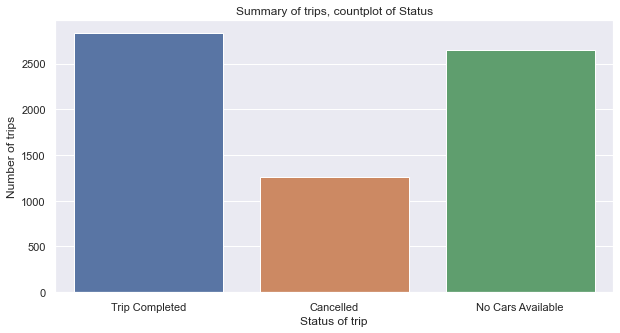

In [1324]:
univariate_analysis("Status")

In [1325]:
uber_data.Status.value_counts(normalize=True)*100

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

<div class="alert alert-block alert-info">
<b>Observation:</b> 
    
1. No cars available status is more than cancelled status. 
2. Trip completed ~ 42%. 58% of the trip requests are not being met. 

Hence, there is a huge supply deficit in Uber
    
    
</div>

In [1326]:
uber_data['Driver id'].nunique()

300

<div class="alert alert-block alert-info">
<b>Observation:</b> 

Only 300 cabs/drivers are available to service all the trip requests 
</div>

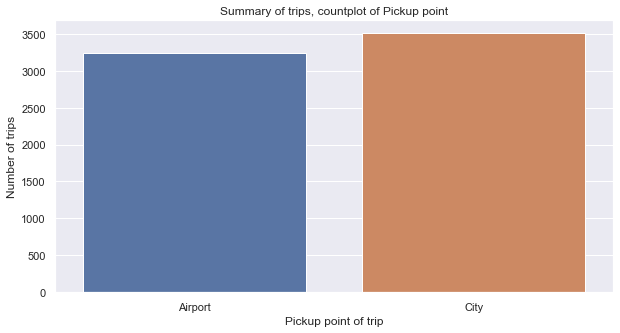

In [1327]:
univariate_analysis("Pickup point")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

City is more preferred than the airports as the passenger pickup point
    
</div>

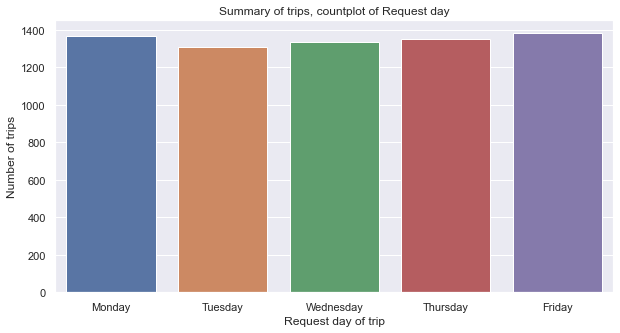

In [1328]:
univariate_analysis("Request day")

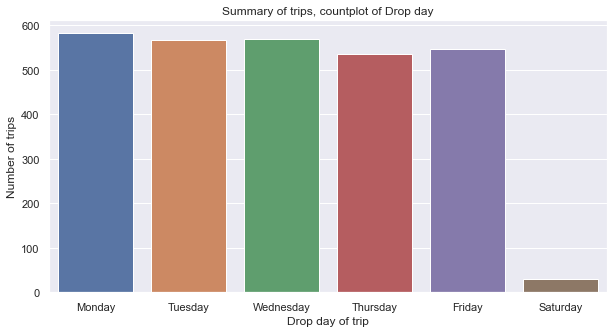

In [1329]:
univariate_analysis("Drop day")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

Passenger requests for an Uber are the highest on Wednesdays.
</div>

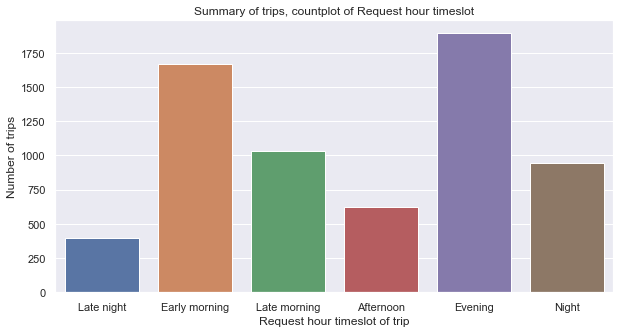

In [1330]:
univariate_analysis("Request hour timeslot")

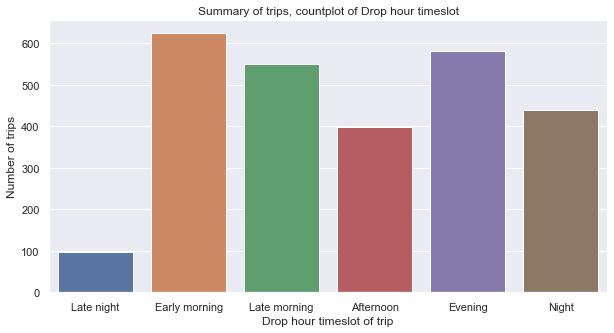

In [1331]:
univariate_analysis("Drop hour timeslot")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

Ubers are requested the highest during evenings and early mornings as is evident from the request and drop hour timeslot distribution
</div>


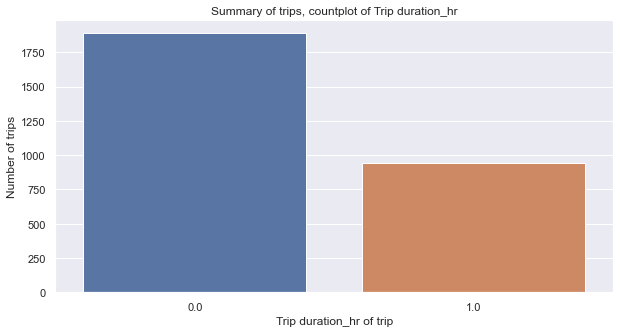

In [1332]:
univariate_analysis("Trip duration_hr")

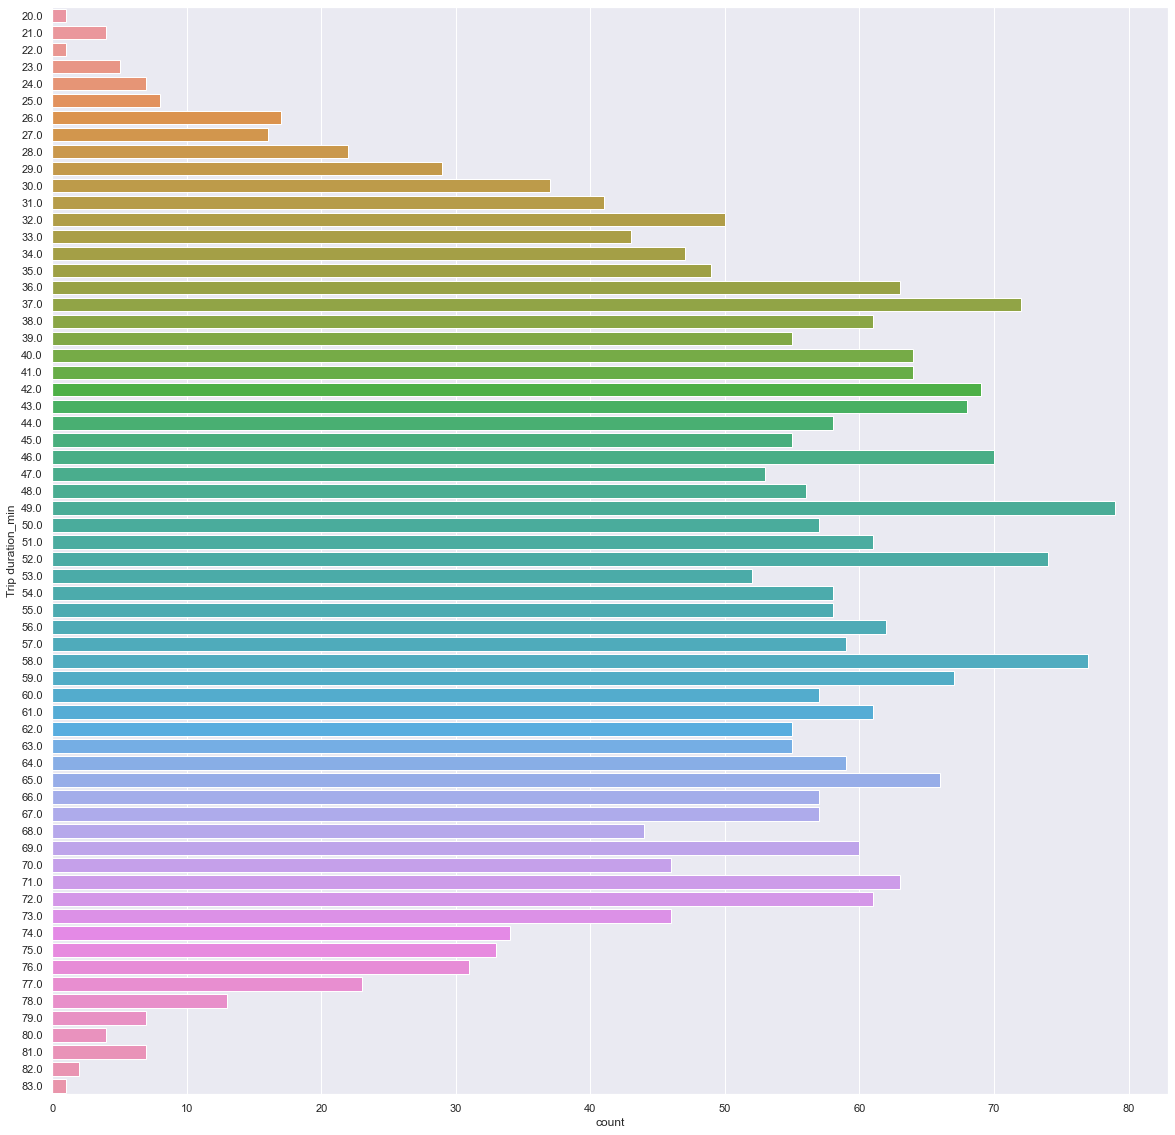

In [1333]:
plt.figure(figsize=(20,20))
sns.countplot(data=uber_data, y="Trip duration_min")
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Highest number of trips last for 49 mins and 60 mins
2. Lowest trip time is 20 mins and highest trip time is 83 mins
3. Most of the trips last for less than one hour
</div>

<span style="color:red">Bivariate analysis</span>

In [1334]:
# function to plt countplots for bivariate analysis

def bivariate_analysis(df, col1, col2):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df,x=col1, hue=col2)

    plt.title("Summary of trips, countplot of {}".format(col1))
    plt.xlabel("{} of trip".format(col1))
    plt.ylabel("Number of trips")

    #for p in ax.patches:
        #ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2 , p.get_height()+50) , ha="center", va="center")

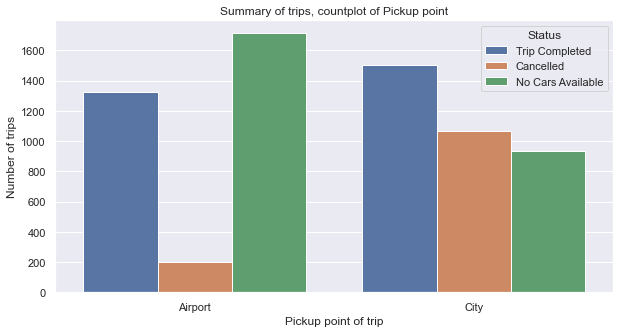

In [1335]:
bivariate_analysis(uber_data ,"Pickup point", "Status")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. There is a huge demand for cabs at the Airport which is not being met due to insufficient number of cabs. Very few cabs are cancelled at the airport. The demand must be addressed immediately
2. Huge number of trips are cancelled when pick up is from the city
</div>


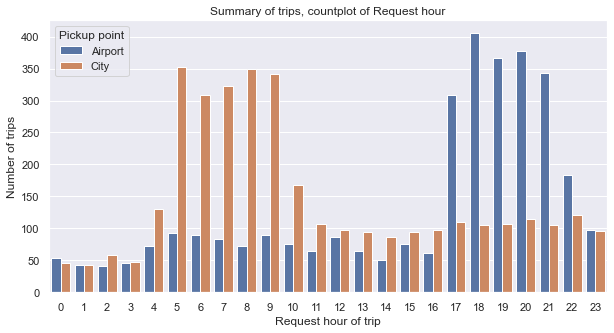

In [1336]:
bivariate_analysis(uber_data, "Request hour", "Pickup point")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Large number of requests are seen in the day at the city(5 AM to 10 AM) and at nights at the airport(5 PM to 9 PM)
2. This suggests that during the daytime, passengers travel to the airport from the city.
3. This also suggests that more passengers land in the evening and travel from airport to the city
</div>

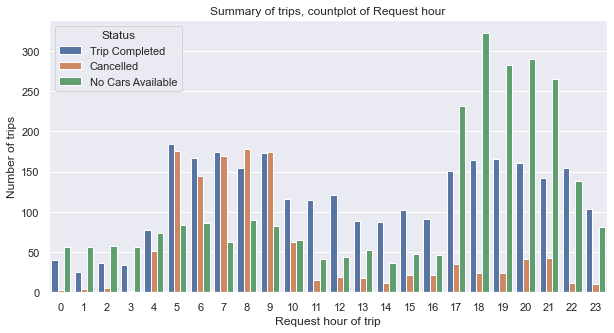

In [1337]:
bivariate_analysis(uber_data, "Request hour", "Status")

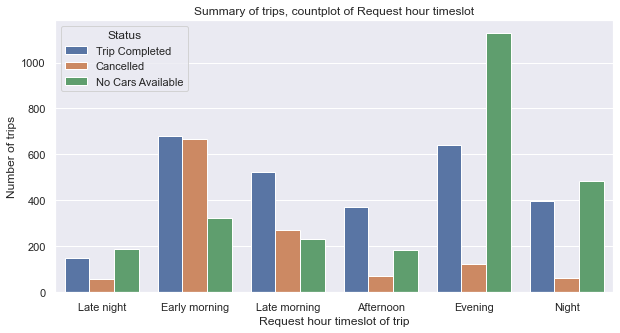

In [1338]:
bivariate_analysis(uber_data, "Request hour timeslot", "Status")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. There is a huge unavailabilty of cabs in the evening.
2. Most of the cabs are cancelled in the morning.
3. Unavailabilty of cabs is higher in the evening, night and late night timeslots
</div>

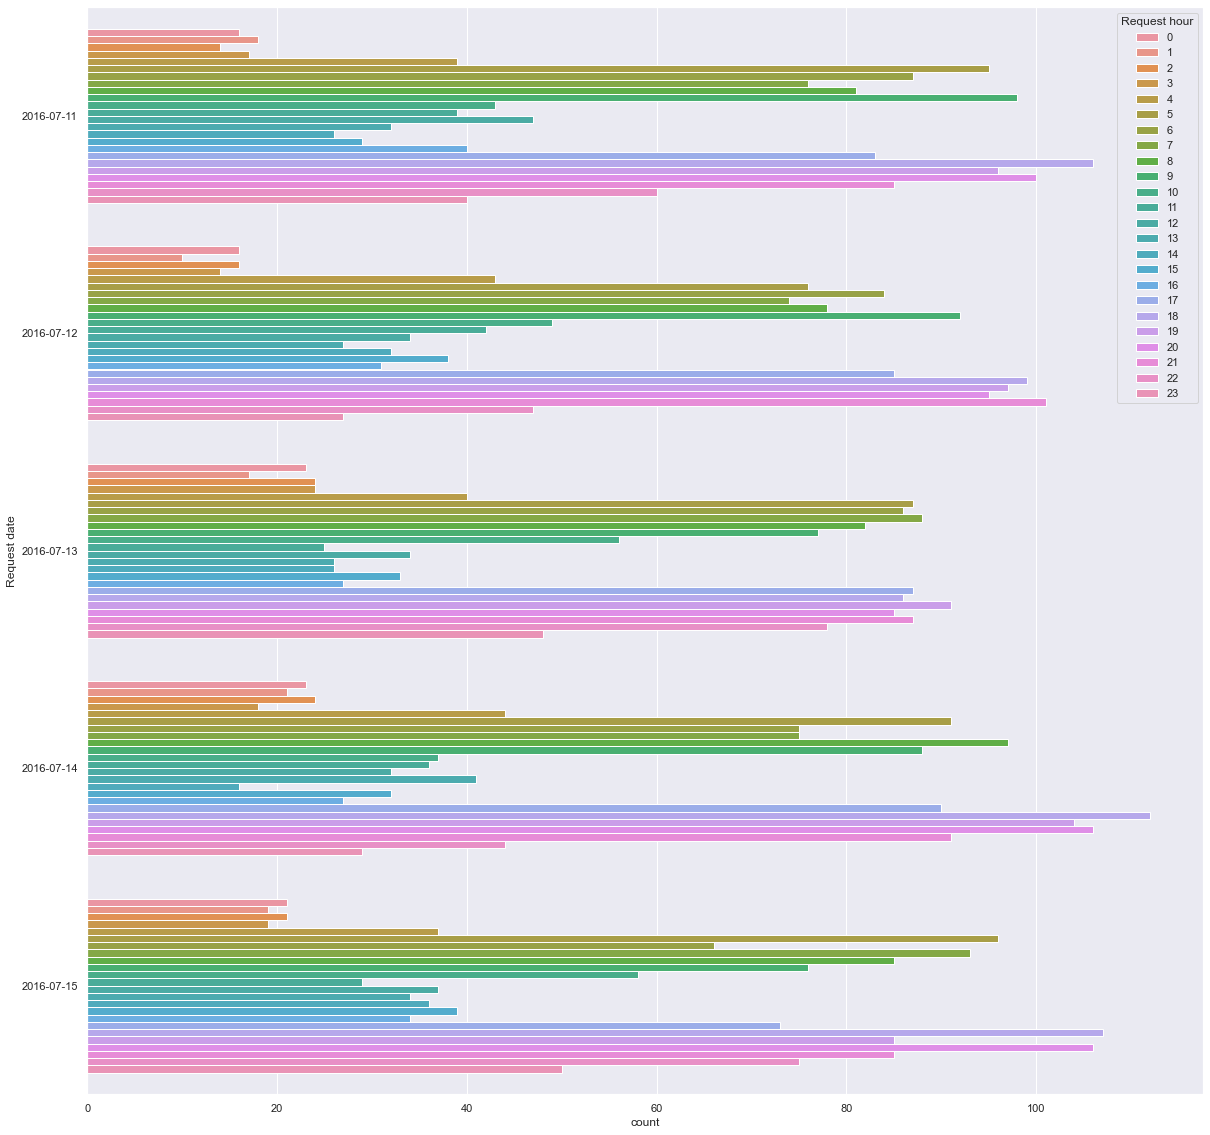

In [1339]:
plt.figure(figsize=(20,20))
sns.countplot(data=uber_data, y="Request date", hue="Request hour")
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

All the dates have the similar pattern of requests, no unusual patterns are observed.
    </div>

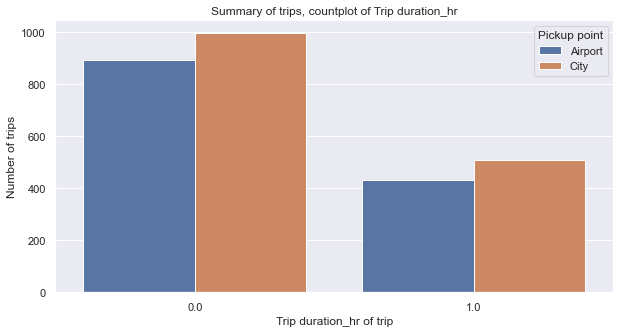

In [1340]:
bivariate_analysis(uber_data, "Trip duration_hr", "Pickup point")

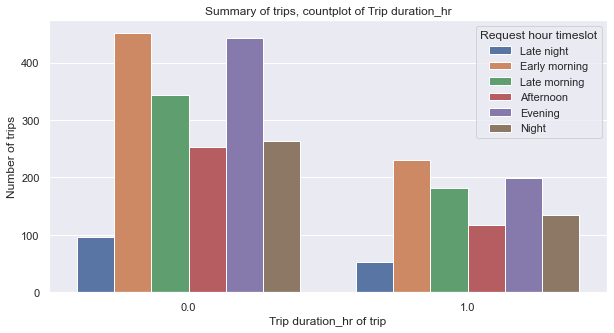

In [1341]:
bivariate_analysis(uber_data, "Trip duration_hr", "Request hour timeslot")

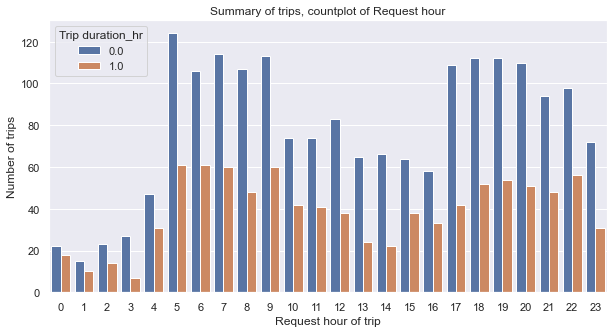

In [1342]:
bivariate_analysis(uber_data, "Request hour", "Trip duration_hr")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Trips from city to Airport and vice versa last for less than 30 mins with few exceptions
2. Trips from city to Airport take little longer than from Airport to the city
3. Number of trip with more than 1 hr of travel time are higher in numbers during peak time
</div>

### Analysis of City and Airport as pickup points

In [1343]:
airport = uber_data[uber_data["Pickup point"] == "Airport"]
city = uber_data[uber_data["Pickup point"] == "City"]

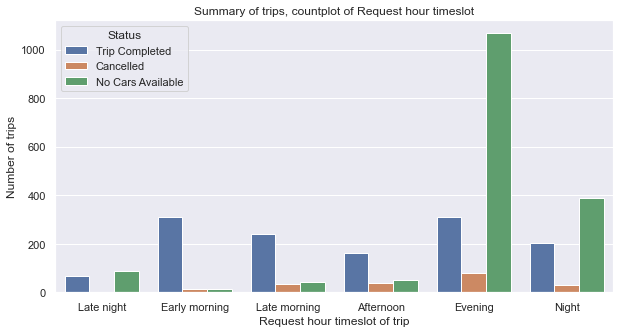

In [1344]:
bivariate_analysis(airport, "Request hour timeslot", "Status")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Cabs are highly unavailable for passengers in the evening and at night time slots
2. Very few cabs were cancelled at when passengers were picked up from the airport
</div>


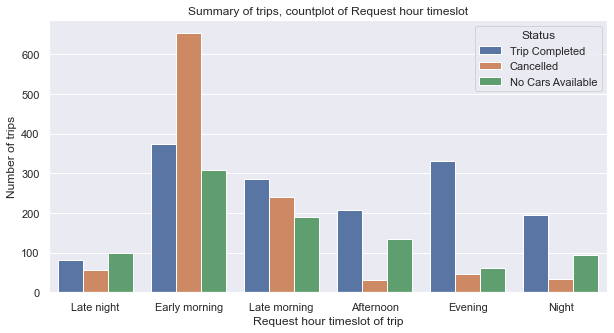

In [1345]:
bivariate_analysis(city, "Request hour timeslot", "Status")

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Higher number of cabs were cancelled in the morning timeslot.
2. Higher number of cabs were unavailable in the mornings too
</div>

In [1346]:
temp = pd.DataFrame(city['Status'].value_counts())
temp = temp.rename(columns = {'Status' : 'City'})
temp['Airport'] = airport.Status.value_counts()
temp_city_total = temp.City.sum()
temp_airport_total = temp.Airport.sum()

temp['City_percent'] = round(temp.City/temp_city_total*100, 2)
temp['Airport_percent']= round(temp.Airport/temp_airport_total*100,2)
temp

,City,Airport,City_percent,Airport_percent
Trip Completed,1504,1327,42.89,40.98
Cancelled,1066,198,30.40,6.11
No Cars Available,937,1713,26.72,52.90


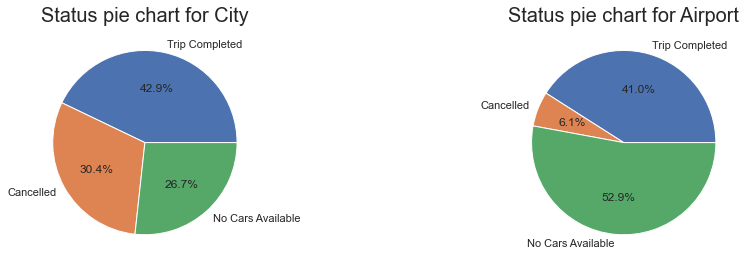

In [1347]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(temp.City, labels=temp.index.values, autopct='%1.1f%%')
ax1.set_title("Status pie chart for City", fontsize = 20)

ax2.pie(temp.Airport, labels=temp.index.values, autopct='%1.1f%%')
ax2.set_title("Status pie chart for Airport", fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Only ~ 40% of the trips are completed and 60% are not serviced. Demand exists and this must be exploited.
2. Drivers cancel trip to the airport from the city in the morning. There is some idle time involved and there is huge demand for cabs in the evening. Idle time at the airport could be cause of unavailabilty of drivers in the evening.
</div>

#### Pickup point - Airport 

<div class="alert alert-block alert-info">

There are more inbound flights in the evenings. Airports have highest number of requests to travel to the city in the evening but not enough cabs are available to service the requests. 

<b>Comparing status in the evening at airport and the city</b>: 
Very few requests have cancelled or no cars available status in the city at the same time and the trip completion is relatively higher in this timeslot - More cars may be in the city during this timeslot
</div>

#### Pickup point - City 

<div class="alert alert-block alert-info">

There are more outbound flights in the mornings. City has highest number of requests in the morning to travel to the airports but most of the trips were cancelled by the drivers.

<b>Comparing status in the morning at airport and the city</b>: 
Very few requests have cancelled or no cars available status in the airport at the same time and the trip completion is relatively higher in this timeslot - More cars may be in the airport during this timeslot
    
Trips could have also been cancelled as it takes longer time from the city to the airport and they prefer to earn more with shorter trips within the city.

</div>

### Supply Demand Analysis at the city

<div class="alert alert-block alert-warning">
<b>Observation:</b> 

The ‘gap’ refers to the difference between the supply and demand for cabs. In other words, it means a consumer-need that supply has not yet met.

A gap in the market represents an opportunity for it to widen its customer base. Market penetration can achieved by identifying a gap in the market and filling it.
    
</div>

In [1348]:
# Overall demand through the day at different timeslots

city_demand_supply = pd.DataFrame(city['Request hour timeslot'].value_counts())
city_demand_supply = city_demand_supply.rename(columns = {'Request hour timeslot' : 'Demand'})

trips_completed = city[city['Status'] == 'Trip Completed']
city_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour timeslot')['Status'].count())

city_demand_supply['Gap'] = city_demand_supply['Demand'] -city_demand_supply['Supply']
city_demand_supply

,Demand,Supply,Gap
Early morning,1335,373,962
Late morning,714,286,428
Evening,436,330,106
Afternoon,374,208,166
Night,323,196,127
Late night,236,82,154


Text(0.5, 1.0, 'Supply-Demand Gap in the City')

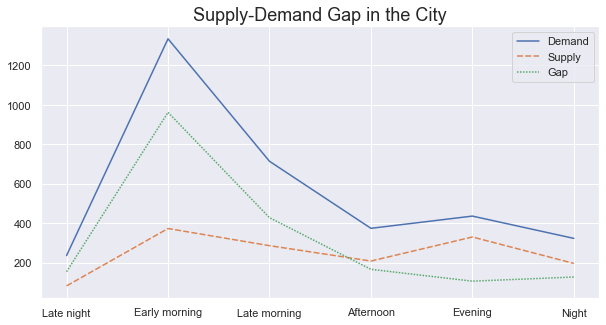

In [1349]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the City", fontsize = 18)

In [1350]:
# Overall demand through the day at different hours

city_demand_supply = pd.DataFrame(city['Request hour'].value_counts())
city_demand_supply = city_demand_supply.rename(columns = {'Request hour' : 'Demand'})

trips_completed = city[city['Status'] == 'Trip Completed']
city_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour')['Status'].count())

city_demand_supply['Gap'] = city_demand_supply['Demand'] -city_demand_supply['Supply']
city_demand_supply.head(10)

,Demand,Supply,Gap
5,353,100,253
8,350,88,262
9,342,99,243
7,323,99,224
6,309,86,223
10,168,63,105
4,131,42,89
22,121,74,47
20,114,87,27
17,110,77,33


Text(0.5, 1.0, 'Supply-Demand Gap in the City')

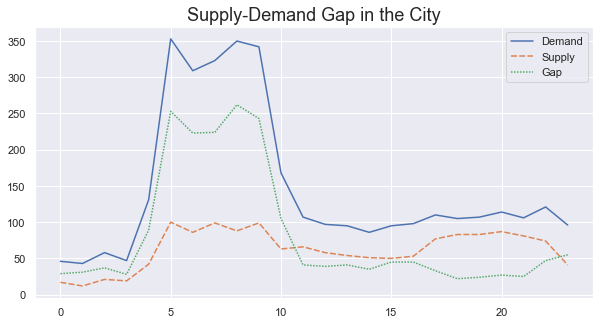

In [1351]:
plt.figure(figsize=(10,5))
sns.lineplot(data=city_demand_supply)
plt.title("Supply-Demand Gap in the City", fontsize = 18)

### Supply Demand Analysis at the airport

In [1352]:
# Overall demand through the day at different timeslots

airport_demand_supply = pd.DataFrame(airport['Request hour timeslot'].value_counts())
airport_demand_supply = airport_demand_supply.rename(columns = {'Request hour timeslot' : 'Demand'})

trips_completed = airport[airport['Status'] == 'Trip Completed']
airport_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour timeslot')['Status'].count())

airport_demand_supply['Gap'] = airport_demand_supply['Demand'] -airport_demand_supply['Supply']
airport_demand_supply

,Demand,Supply,Gap
Evening,1457,312,1145
Night,624,203,421
Early morning,337,308,29
Late morning,315,239,76
Afternoon,252,162,90
Late night,158,67,91


Text(0.5, 1.0, 'Supply-Demand Gap at the Airport')

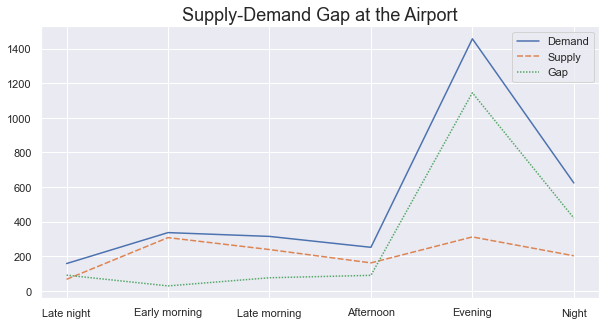

In [1353]:
plt.figure(figsize=(10,5))
sns.lineplot(data=airport_demand_supply)
plt.title("Supply-Demand Gap at the Airport", fontsize = 18)

In [1354]:
# Overall demand through the day at different hours

airport_demand_supply = pd.DataFrame(airport['Request hour'].value_counts())
airport_demand_supply = airport_demand_supply.rename(columns = {'Request hour' : 'Demand'})

trips_completed = airport[airport['Status'] == 'Trip Completed']
airport_demand_supply['Supply'] = pd.DataFrame(trips_completed.groupby('Request hour')['Status'].count())

airport_demand_supply['Gap'] = airport_demand_supply['Demand'] -airport_demand_supply['Supply']
airport_demand_supply.head(10)

,Demand,Supply,Gap
18,405,81,324
20,378,74,304
19,366,83,283
21,343,61,282
17,308,74,234
22,183,80,103
23,98,62,36
5,92,85,7
6,89,81,8
9,89,74,15


Text(0.5, 1.0, 'Supply-Demand Gap at the Airport')

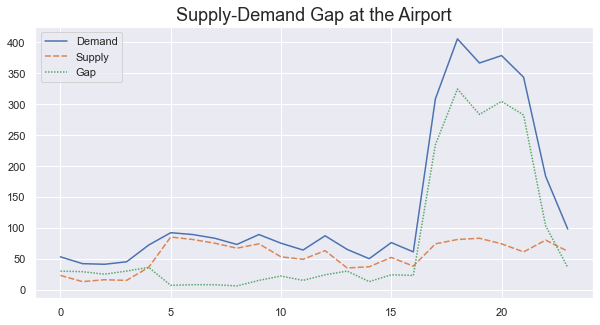

In [1355]:
plt.figure(figsize=(10,5))
sns.lineplot(data=airport_demand_supply)
plt.title("Supply-Demand Gap at the Airport", fontsize = 18)

In [1356]:
airport_demand_supply.apply(lambda x: x.sum())

Demand    3238
Supply    1327
Gap       1911
dtype: int64

In [1357]:
city_demand_supply.apply(lambda x: x.sum())

Demand    3507
Supply    1504
Gap       2003
dtype: int64

### Analyis of gap

<div class="alert alert-block alert-info">
<b>Observation:</b> 

- Only 300 cabs are available over the whole day currently to service all requests. 
- “Passengers” generate the demand, “Drivers” supply the demand. We observe a supply of more than 1300 and a gap of more than 2000.
- Highest demand is seen at the airport in the evening timeslot and the gap is > 1100
- Gap range more than 200 per hour and less than 350 per hour is observed at peak timeslot.
- At the city - Highest gap is observed from 5 AM to 9 AM.
- At the airport - Highest gap is observed from 5 PM to 9 PM


More cabs must be made available at these peak timeslots. 
    
</div>

### Recommendations to bridge the supply demand gaps

<div class="alert alert-block alert-success">

1. <b>Increase the number of cabs</b> to capture the incomplete requests at the city in the morning and at the airports in the evening.
2. <b>Introduce surge pricing/dynamic pricing</b> for trips during peak hours. Some drivers move to the surge region to earn extra (increases supply). Some passengers may opt to wait to get a ride (reduces demand)
3. <b>Introduce car pooling service</b>. Passengers can split the cost of the ride with somebody else. This could be an alternative option if passenger does not want to pay an exorbitant surge price to travel.
4. <b>Set a threshold to the number of trip cancellations</b> in a day and impose penalty if cancellations exceed the threshold.
5. <b>Monitor the inbound and outbound flight schedule</b> to plan ahead on the number of cabs that must be available to minimize the incomplete requests.
6. <b>Increase market share</b> by marketing offers and campaigns to encourage passengers to plan trips in the timeslots where requests are low
    
7. <b>Trip cancellations</b> from the city may be due to idle time at the airport or returning empty on the return trip. 
    - Uber coul provide <b>incentive or bonus to the drivers who complete the Airport <-> City trips</b> or 
    - <b>pay a base price for the idle time</b> to bring down trip cancellations from the city and non-availability of cabs at the airport. 
</div>